In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn import linear_model, cross_validation
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Airline-Delay-US-Aug2006-Aug2016.csv')
## csv file downloaded manually from 
## http://www.transtats.bts.gov/ot_delay/ot_delaycause1.asp

In [3]:
df.head()

,year,month,carrier,carrier_name,airport,arrival_flights,arrival_delayed,arrival_cancelled,arrival_diverted,mins_arrival_delay,mins_carrier_delay,mins_weather_delay,mins_nas_delay,mins_security_delay,mins_late_aircraft_delay
0,2006,8,AA,American Airlines Inc.,ABQ,310.0,73.0,5.0,1.0,3742.0,838.0,585.0,729.0,21.0,1569.0
1,2006,8,AA,American Airlines Inc.,ANC,62.0,38.0,0.0,0.0,2605.0,879.0,100.0,870.0,0.0,756.0
2,2006,8,AA,American Airlines Inc.,ATL,731.0,188.0,15.0,7.0,9808.0,1584.0,847.0,4329.0,62.0,2986.0
3,2006,8,AA,American Airlines Inc.,AUS,802.0,171.0,9.0,0.0,9413.0,2048.0,775.0,1792.0,68.0,4730.0
4,2006,8,AA,American Airlines Inc.,BDL,279.0,80.0,3.0,0.0,4855.0,889.0,231.0,1238.0,7.0,2490.0


In [4]:
df.describe()

,year,month,arrival_flights,arrival_delayed,arrival_cancelled,arrival_diverted,mins_arrival_delay,mins_carrier_delay,mins_weather_delay,mins_nas_delay,mins_security_delay,mins_late_aircraft_delay
count,162987.000000,162987.000000,162720.000000,162680.000000,162720.000000,162720.000000,162720.000000,162720.000000,162720.000000,162720.000000,162720.000000,162720.000000
mean,2010.739550,6.554191,395.468351,78.686360,6.873156,0.939546,4433.660232,1316.528140,211.357018,1160.808014,6.524385,1738.442675
std,2.902465,3.444747,1039.068123,208.511672,28.734446,4.237836,12893.960669,3469.113903,835.259447,4627.666515,34.080515,5279.902599
min,2006.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,4.000000,62.000000,11.000000,0.000000,0.000000,519.000000,180.000000,0.000000,72.000000,0.000000,112.000000
50%,2011.000000,7.000000,127.000000,26.000000,1.000000,0.000000,1330.000000,484.000000,27.000000,232.000000,0.000000,419.000000
75%,2013.000000,10.000000,285.000000,61.000000,5.000000,1.000000,3306.000000,1169.000000,159.000000,652.000000,0.000000,1221.000000
max,2016.000000,12.000000,21977.000000,5268.000000,1389.000000,256.000000,395609.000000,196944.000000,57707.000000,137443.000000,3119.000000,148181.000000


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 9.418e+05
Date:                Sat, 12 Nov 2016   Prob (F-statistic):               0.00
Time:                        22:37:09   Log-Likelihood:            -9.4375e+05
No. Observations:              162680   AIC:                         1.887e+06
Df Residuals:                  162678   BIC:                         1.888e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.3938      0.212     25.407      0.0

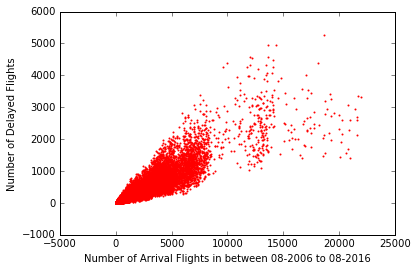

In [3]:
#SCATTER PLOT, relationship in between arrival flights and number of delay
x=df['arrival_flights'] #features
y=df['arrival_delayed'] #target

plt.scatter(x,y,color='r', s=1)
plt.xlabel('Number of Arrival Flights in between 08-2006 to 08-2016')
plt.ylabel('Number of Delayed Flights')

#ORDINARY LEAST SQUARES
from statsmodels.formula.api import ols
data = pd.DataFrame({'x':x,'y':y})
model = ols("y ~ x",data).fit()
print(model.summary())

In [4]:
#CLEAN THE DATA

df1 = df.dropna()

x1 = (df1['arrival_flights'])
y1 = (df1['arrival_delayed'])

##x1.dropna(inplace=True)
##y1.dropna(inplace=True)

print(len(x1), len(y1))

X = np.array(x1)
y = np.array(y1)

print(len(X), len(y))

162680 162680
162680 162680


[ 0.18606508]


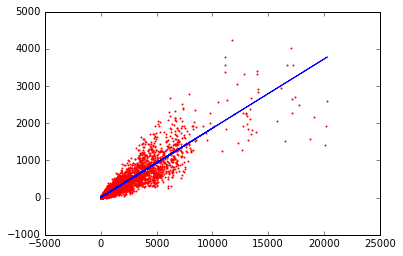

In [5]:
#MACHINE LEARNING - LINEAR REGRESSION

#x_train = X[:-30000] #save 20% for testing data
#y_train = Y[:-30000]
#x_test = X[-30000:]
#y_test = Y[-30000:]

x_train, x_test, y_train, y_test = cross_validation.train_test_split(X.reshape(len(X),1), y, test_size=0.2)

linreg = linear_model.LinearRegression()
linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)
plt.scatter(x_test,y_test, color='r',s=1)
plt.plot(x_test,y_pred, color='b')
print(linreg.coef_) 
